In [ ]:
!mkdir -p -/.kaggle
!cp kaggle.json -/.kaggle/

mkdir: invalid option -- '/'
Try 'mkdir --help' for more information.
cp: invalid option -- '/'
Try 'cp --help' for more information.


In [ ]:
!kaggle datasets download -d haroon669/cats-vs-dogs-dataset-10k-cat-10k-dog-images

Dataset URL: https://www.kaggle.com/datasets/haroon669/cats-vs-dogs-dataset-10k-cat-10k-dog-images
License(s): CC0-1.0
 98% 1.04G/1.06G [00:17<00:00, 93.6MB/s]
100% 1.06G/1.06G [00:17<00:00, 66.2MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/cats-vs-dogs-dataset-10k-cat-10k-dog-images.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense , Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dataset=keras.utils.image_dataset_from_directory(
        directory='/content/train',
        labels='inferred',
        label_mode='int',
        batch_size=32,
        image_size=(256,256))
test_dataset=keras.utils.image_dataset_from_directory(
        directory= '/content/test',
        labels='inferred',
        label_mode='int',
        batch_size=32,
        image_size=(256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
    image=tf.cast(image/255.,tf.float32)
    return image,label
train_ds=train_dataset.map(process)
test_ds=test_dataset.map(process)

In [ ]:
cnn=Sequential()
cnn.add(Conv2D(32,kernel_size=(3,3),padding='valid',input_shape=(256,256,3),activation='relu'))
cnn.add(BatchNormalization())#conventional
cnn.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))#pooling
cnn.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))# again conventional
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))#again pooling
cnn.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))# again conventional
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))
cnn.add(Flatten())


cnn.add(Dense(128,activation='relu'))# all are hidden layer of ANN
cnn.add(Dropout(0.1))
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(Dense(32,activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(Dense(1,activation='sigmoid'))

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [51]:
cnn.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
history=cnn.fit(train_ds,epochs=5,validation_data=test_ds,callbacks=EarlyStopping())

Epoch 1/5
625/625 [==============================] - 80s 118ms/step - loss: 0.4073 - accuracy: 0.8189 - val_loss: 0.4393 - val_accuracy: 0.8002
Epoch 2/5
625/625 [==============================] - 66s 105ms/step - loss: 0.4015 - accuracy: 0.8212 - val_loss: 0.4327 - val_accuracy: 0.8044
Epoch 3/5
625/625 [==============================] - 70s 111ms/step - loss: 0.3916 - accuracy: 0.8264 - val_loss: 0.4278 - val_accuracy: 0.8062
Epoch 4/5
625/625 [==============================] - 66s 105ms/step - loss: 0.3872 - accuracy: 0.8278 - val_loss: 0.4236 - val_accuracy: 0.8106
Epoch 5/5
625/625 [==============================] - 68s 108ms/step - loss: 0.3804 - accuracy: 0.8316 - val_loss: 0.4200 - val_accuracy: 0.8130


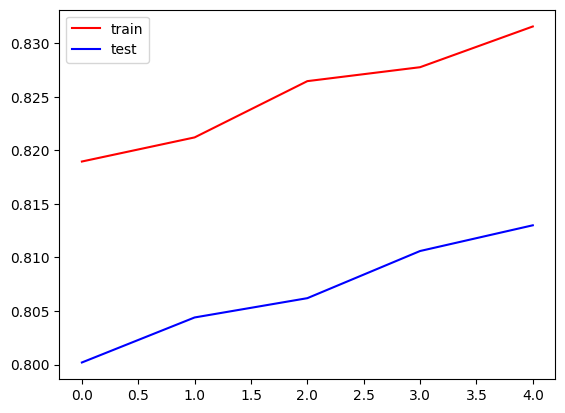

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

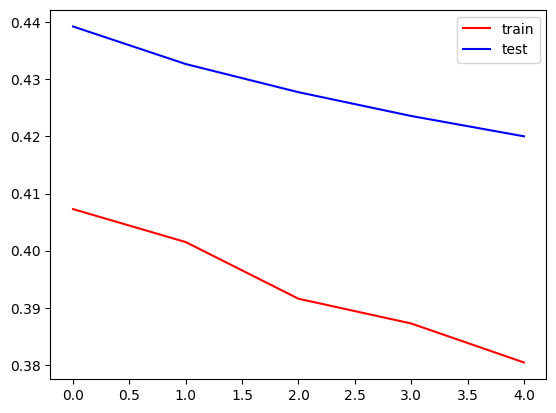

In [54]:


plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

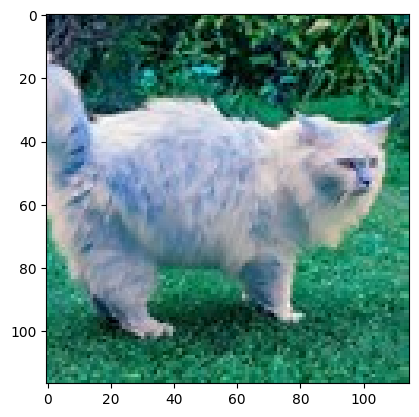

In [55]:
import cv2
test_img=cv2.imread('/content/download.jpg')
plt.imshow(test_img)


In [56]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
cnn.predict(test_input)

1/1 [==============================] - 0s 117ms/step


array([[0.]], dtype=float32)

1/1 [==============================] - 0s 26ms/step


array([[0.]], dtype=float32)

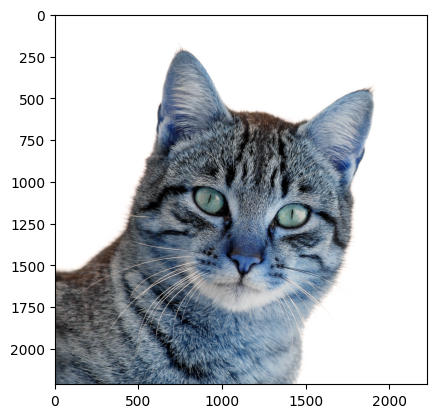

In [59]:
test_img=cv2.imread('/content/R.jpg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
cnn.predict(test_input)

1/1 [==============================] - 0s 33ms/step


array([[3.308565e-29]], dtype=float32)

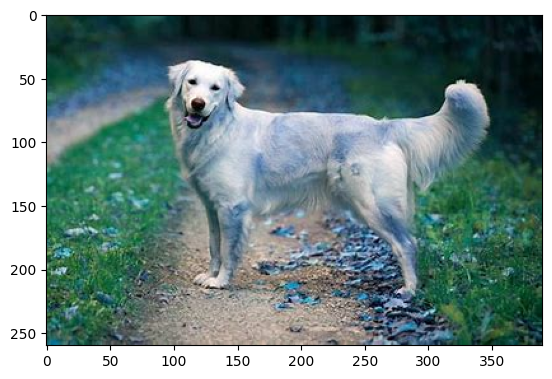

In [60]:
test_img=cv2.imread('/content/OIPp.jpg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
cnn.predict(test_input)

1/1 [==============================] - 0s 42ms/step


array([[0.]], dtype=float32)

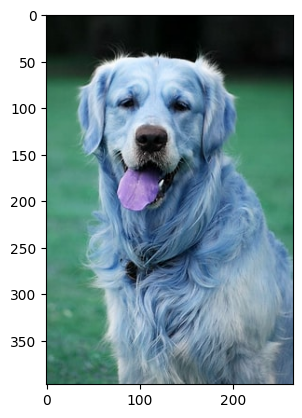

In [61]:
test_img=cv2.imread('/content/th.jpg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
cnn.predict(test_input)